# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('aqi_dataset.csv')
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [ ]:
data.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [ ]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


In [ ]:
data.isna().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

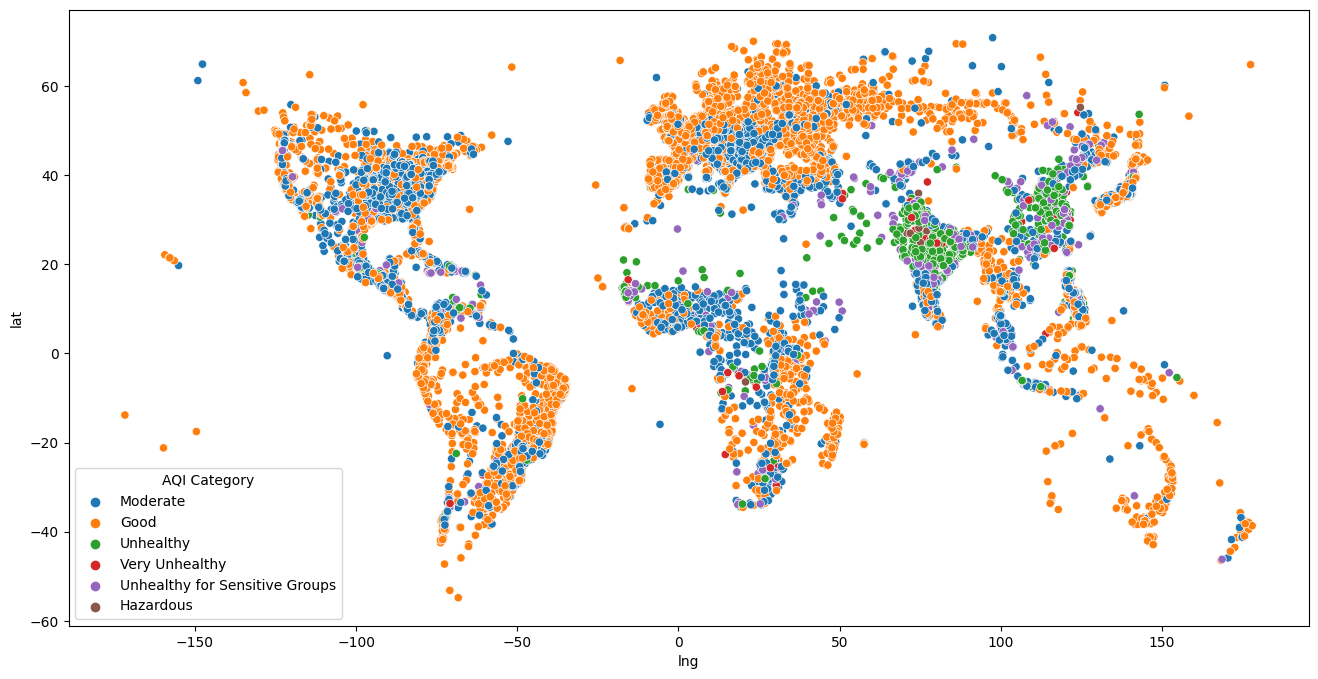

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x='lng', y='lat', hue='AQI Category')
plt.show()

In [ ]:
country = data.groupby('Country', as_index=False).agg('sum').sort_values(by=['AQI Value'], ascending=False).head(5)
country

<ipython-input-24-e2a62ebb6bc4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country = data.groupby('Country', as_index=False).agg('sum').sort_values(by=['AQI Value'], ascending=False).head(5)


,Country,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
166,United States of America,236573,5978,110051,33541,230068,147676.0446,-331877.0770
69,India,113331,1349,42856,1405,111248,17031.1846,63001.1184
75,Italy,53554,975,38108,2003,48642,36842.3339,10018.7227
33,China,53517,1448,36358,2911,47408,14446.1109,49689.7202
58,Germany,50987,854,38052,2084,48625,54307.5594,9789.3687


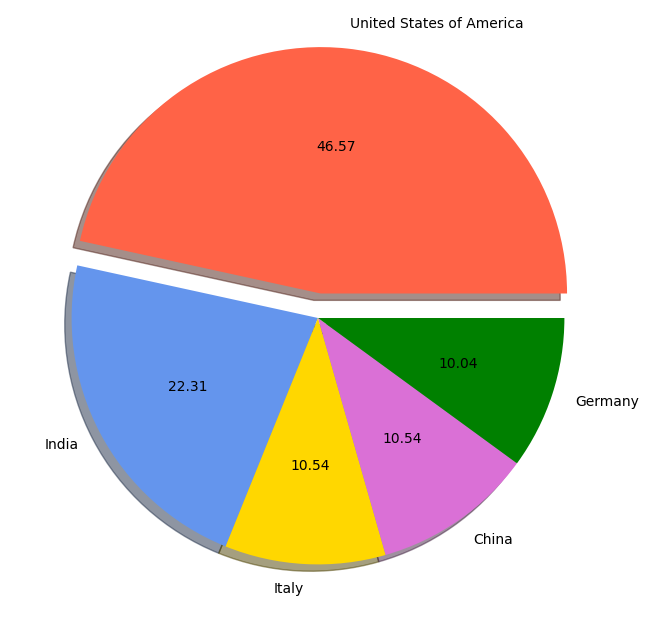

In [ ]:
plt.figure(figsize=(10, 8))
plt.pie(data=country, x='AQI Value', labels='Country', autopct='%.2f', shadow=True, explode=(0.1, 0, 0, 0, 0), colors=[
'tomato', 'cornflowerblue', 'gold', 'orchid', 'green'])
plt.show()

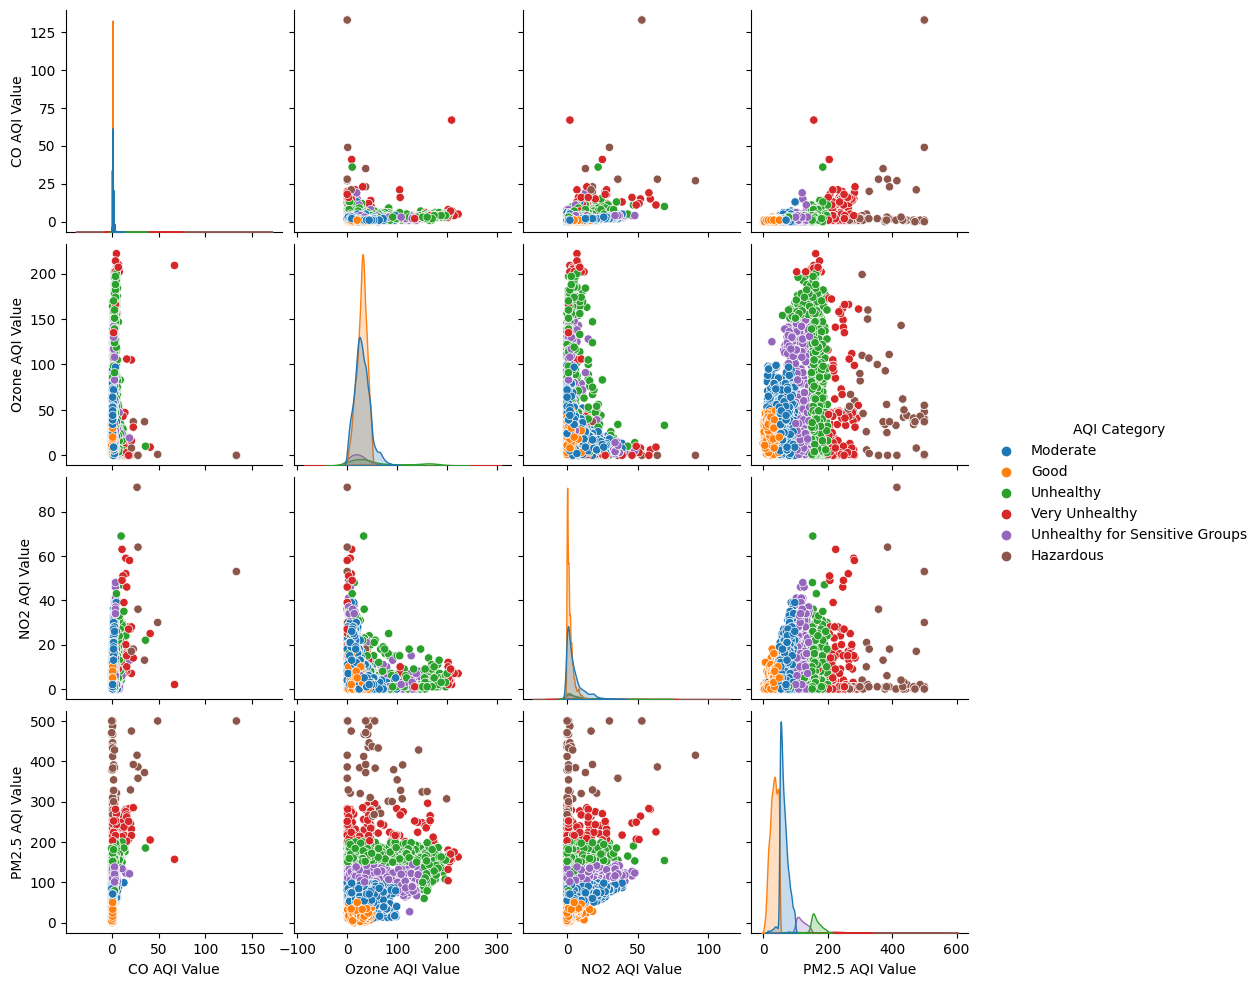

In [ ]:
sns.pairplot(data=data, vars=['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'], diag_kind='kde', hue='AQI Category')

In [ ]:
polluted_cities = data.sort_values('AQI Value', ascending=False).head(10)
polluted_cities

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
578,India,Mahendragarh,500,Hazardous,1,Good,42,Good,0,Good,435,Hazardous,28.2800,76.1500
1808,India,Jodhpur,500,Hazardous,0,Good,34,Good,0,Good,378,Hazardous,26.2800,73.0200
15896,Russian Federation,Tynda,500,Hazardous,21,Good,8,Good,17,Good,475,Hazardous,55.1667,124.7167
7510,India,Maur,500,Hazardous,1,Good,62,Moderate,1,Good,433,Hazardous,47.3417,8.6703
3770,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous,37.2659,-107.8781
3769,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous,43.1689,-2.6300
3768,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous,24.0250,-104.6675
7509,India,Maur,500,Hazardous,1,Good,62,Moderate,1,Good,433,Hazardous,30.0833,75.2500
3751,India,Delhi,500,Hazardous,1,Good,44,Good,2,Good,446,Hazardous,37.4306,-120.7759
3750,India,Delhi,500,Hazardous,1,Good,44,Good,2,Good,446,Hazardous,28.6100,77.2300


In [ ]:
print('No2 AQI Categories')
print(data['NO2 AQI Category'].value_counts())
print('\nCO AQI Categories')
print(data['CO AQI Category'].value_counts())
print('\nPM2.5 AQI Categories')
print(data['PM2.5 AQI Category'].value_counts())
print('\nOzone AQI Categories')
print(data['Ozone AQI Category'].value_counts())

No2 AQI Categories
Good        16684
Moderate       11
Name: NO2 AQI Category, dtype: int64

CO AQI Categories
Good                              16691
Unhealthy for Sensitive Groups        3
Moderate                              1
Name: CO AQI Category, dtype: int64

PM2.5 AQI Categories
Good                              7936
Moderate                          6882
Unhealthy for Sensitive Groups     881
Unhealthy                          828
Very Unhealthy                     115
Hazardous                           53
Name: PM2.5 AQI Category, dtype: int64

Ozone AQI Categories
Good                              15529
Moderate                            806
Unhealthy for Sensitive Groups      176
Unhealthy                           159
Very Unhealthy                       25
Name: Ozone AQI Category, dtype: int64


# DBSCAN

In [ ]:
selected_features = ['City' ,'AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
X = data[selected_features]
X.set_index('City', inplace=True)
X.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
City,,,,,,,
Praskoveya,51,1,36,0,51,44.7444,44.2031
Presidente Dutra,41,1,5,1,41,-5.2900,-44.4900
Presidente Dutra,41,1,5,1,41,-11.2958,-41.9869
Priolo Gargallo,66,1,39,2,66,37.1667,15.1833
Przasnysz,34,1,34,0,20,53.0167,20.8833


## Determining eps & MinPts

In [ ]:
# min_pts = 2*len(selected_features)
min_pts = len(selected_features) + 1

print(f'MinPts by rule of Thumb: {min_pts}')

MinPts by rule of Thumb: 9


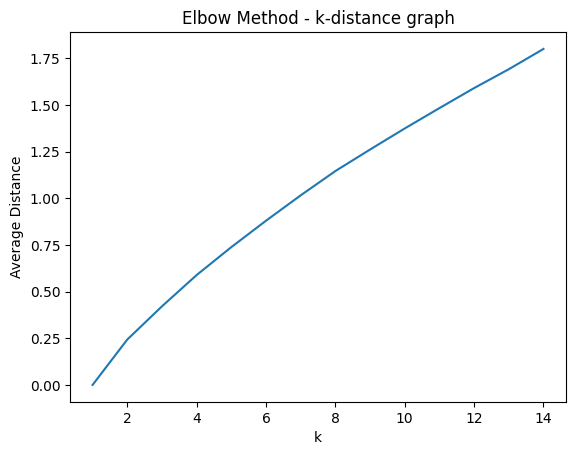

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Compute the k-distance graph
k_values = range(1, min_pts-1)  # Try different values of k
k_distances = []

scaler = StandardScaler()
# scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
# # Apply dimensionality reduction using PCA
# pca = PCA(n_components=2)  # Specify the desired number of components
# X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

for k in k_values:
    neigh = NearestNeighbors(n_neighbors=k)
    neighbors = neigh.fit(X_tsne)
    distances, _ = neighbors.kneighbors(X_tsne)
    avg_distance = np.mean(distances[:, -1])  # Average distance to the k-th neighbor
    k_distances.append(avg_distance)

# Plot the k-distance graph
plt.plot(k_values, k_distances)
plt.xlabel('k')
plt.ylabel('Average Distance')
plt.title('Elbow Method - k-distance graph')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# List of eps values to try
eps_values = np.arange(0.1, 2.0, 0.1)

# Iterate over different eps values and calculate silhouette scores
silhouette_scores = []
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_pts)
    dbscan.fit(X)
    labels = dbscan.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Find the index of the eps value with the highest silhouette score
best_eps_index = np.argmax(silhouette_scores)
best_eps = eps_values[best_eps_index]

# Print the best eps value and its corresponding silhouette score
print(f"Best eps value: {best_eps}")
print(f"Corresponding silhouette score: {silhouette_scores[best_eps_index]}")

Best eps value: 1.9000000000000001
Corresponding silhouette score: 0.7606036890224392


In [ ]:
from sklearn.metrics import silhouette_score

# List of eps values to try
# eps_values = np.arange(0.1, 2.0, 0.1)
pts_values = np.arange(2*len(selected_features), 5*len(selected_features), 5)

# Iterate over different eps values and calculate silhouette scores
silhouette_scores = []
for min_pts in pts_values:
    dbscan = DBSCAN(eps=1.9, min_samples=min_pts)
    dbscan.fit(X_pca)
    labels = dbscan.labels_
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Find the index of the eps value with the highest silhouette score
best_eps_index = np.argmax(silhouette_scores)
best_eps = pts_values[best_eps_index]

# Print the best eps value and its corresponding silhouette score
print(f"Best MinPts value: {best_eps}")
print(f"Corresponding silhouette score: {silhouette_scores[best_eps_index]}")

Best MinPts value: 16
Corresponding silhouette score: 0.8877277433596324


In [ ]:
eps = 1.9
min_pts = 16

eps,min_pts

(1.9, 16)

In [ ]:
distance_metric = 'manhattan'
dbscan = DBSCAN(eps=eps, min_samples=min_pts, metric=distance_metric)
dbscan.fit(X_tsne)
labels = dbscan.labels_

In [ ]:
import numpy as np
from collections import Counter

# Use Counter to count the occurrences of each value in the array
value_counts = Counter(labels)

# Print the value counts
for value, count in value_counts.items():
    print(f"{value}: {count}")

0: 43
171: 17
-1: 7114
1: 43
2: 48
322: 16
3: 24
193: 16
282: 20
184: 32
4: 21
259: 21
5: 28
279: 21
288: 18
6: 61
176: 37
7: 46
8: 44
9: 33
33: 23
251: 24
13: 23
10: 44
286: 16
11: 23
191: 33
12: 75
14: 33
179: 28
15: 23
16: 56
175: 18
17: 59
18: 34
19: 47
182: 22
20: 38
21: 58
22: 55
332: 18
23: 20
24: 24
180: 40
25: 43
26: 40
91: 23
27: 63
141: 34
242: 16
199: 35
105: 42
90: 53
250: 17
109: 54
217: 21
113: 50
28: 40
29: 46
101: 39
30: 29
65: 20
201: 37
170: 22
31: 20
82: 28
243: 48
210: 19
32: 27
60: 23
218: 16
310: 21
34: 35
157: 53
35: 44
226: 19
230: 33
36: 47
37: 32
38: 33
39: 56
203: 35
40: 36
228: 24
41: 19
289: 13
42: 28
43: 36
44: 26
45: 34
54: 16
52: 19
177: 27
46: 82
89: 53
47: 32
198: 26
48: 21
165: 48
301: 17
49: 24
50: 40
143: 49
163: 24
51: 21
53: 19
342: 13
55: 49
56: 26
57: 24
63: 56
321: 16
161: 23
300: 25
306: 17
58: 27
59: 30
188: 22
61: 22
241: 34
62: 39
75: 31
278: 21
64: 29
69: 32
72: 16
183: 32
66: 18
116: 26
67: 56
304: 21
92: 47
68: 34
102: 26
298: 17
77: 31

In [ ]:
data['cluster_labels'] = labels
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,cluster_labels
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031,0
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900,171
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869,-1
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833,-1
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833,1


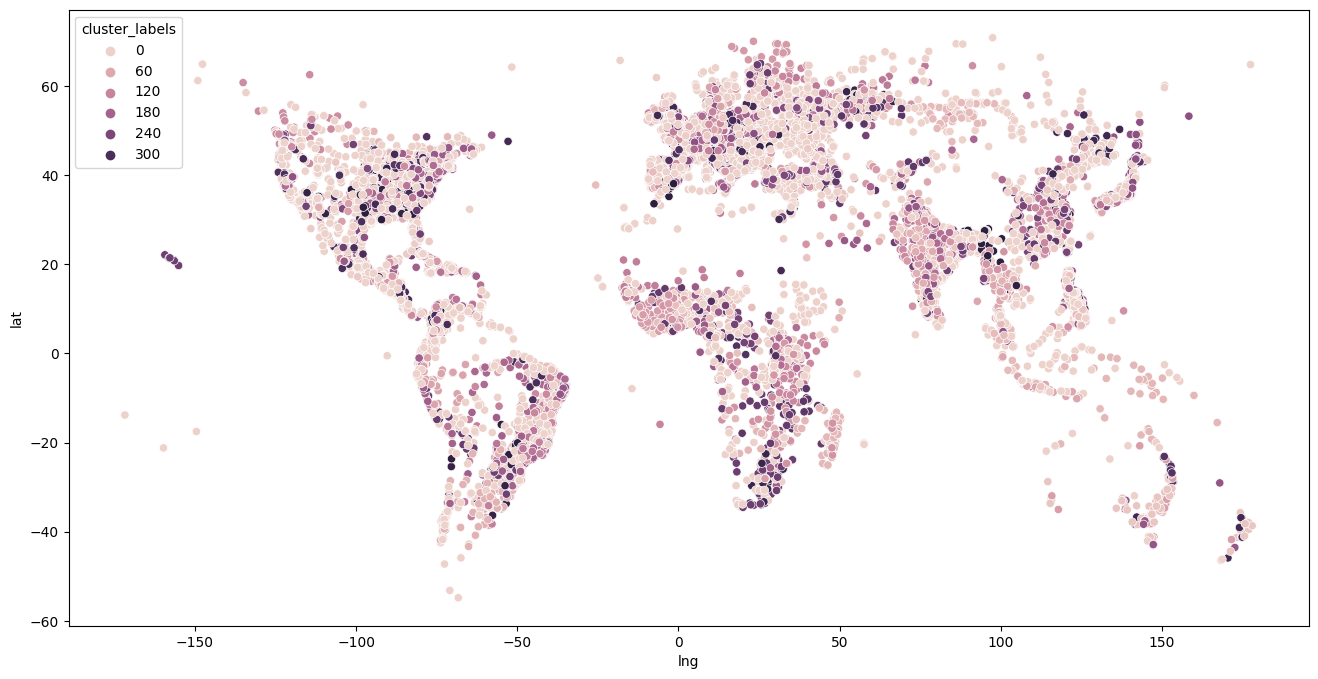

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x='lng', y='lat', hue='cluster_labels')
plt.show()

In [ ]:
new_df = data[data['cluster_labels']!=-1]
new_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,cluster_labels
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031,0
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900,171
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833,1
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074,2
6,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,26.8941,-82.0513,2


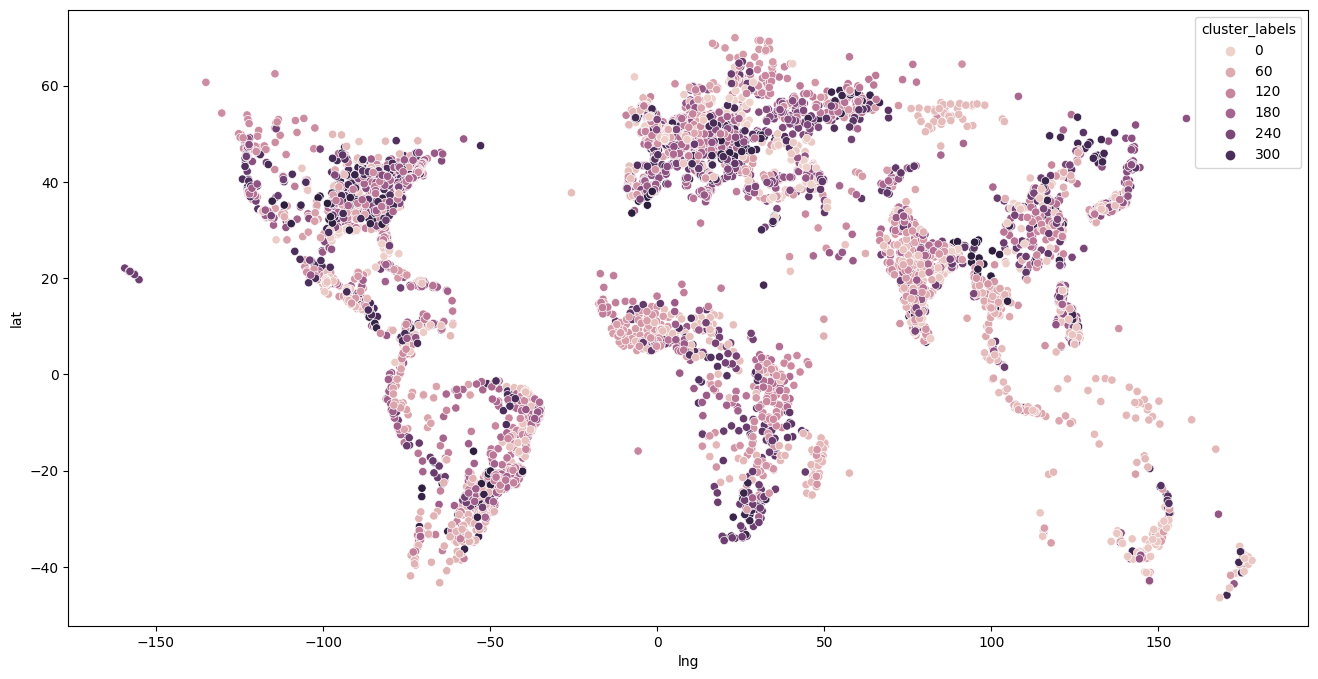

In [ ]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=new_df, x='lng', y='lat', hue='cluster_labels')
plt.show()

In [ ]:
data.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng', 'cluster_labels'],
      dtype='object')

In [ ]:
data['AQI Category'].value_counts()

Good                              7708
Moderate                          7054
Unhealthy                          871
Unhealthy for Sensitive Groups     869
Very Unhealthy                     131
Hazardous                           62
Name: AQI Category, dtype: int64

In [ ]:
data['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy',
       'Unhealthy for Sensitive Groups', 'Hazardous'], dtype=object)

In [ ]:
import pandas as pd

# Group the data by 'cluster_labels' and calculate the mode of 'AQI Category' for each cluster
cluster_aqi_category = data.groupby('cluster_labels')['AQI Category'].agg(lambda x: x.mode()[0])

# Print the cluster labels and their corresponding mode AQI Category
for cluster_label, aqi_category in cluster_aqi_category.items():
    print(f"Cluster {cluster_label}: AQI Category - {aqi_category}")

Cluster -1: AQI Category - Good
Cluster 0: AQI Category - Good
Cluster 1: AQI Category - Good
Cluster 2: AQI Category - Moderate
Cluster 3: AQI Category - Moderate
Cluster 4: AQI Category - Good
Cluster 5: AQI Category - Good
Cluster 6: AQI Category - Good
Cluster 7: AQI Category - Moderate
Cluster 8: AQI Category - Good
Cluster 9: AQI Category - Moderate
Cluster 10: AQI Category - Moderate
Cluster 11: AQI Category - Good
Cluster 12: AQI Category - Moderate
Cluster 13: AQI Category - Moderate
Cluster 14: AQI Category - Very Unhealthy
Cluster 15: AQI Category - Moderate
Cluster 16: AQI Category - Good
Cluster 17: AQI Category - Good
Cluster 18: AQI Category - Good
Cluster 19: AQI Category - Unhealthy
Cluster 20: AQI Category - Moderate
Cluster 21: AQI Category - Moderate
Cluster 22: AQI Category - Unhealthy
Cluster 23: AQI Category - Unhealthy
Cluster 24: AQI Category - Good
Cluster 25: AQI Category - Unhealthy for Sensitive Groups
Cluster 26: AQI Category - Good
Cluster 27: AQI Categor

In [ ]:
data_with_cluster_aqi_category = data.merge(cluster_aqi_category, left_on='cluster_labels', right_index=True, suffixes=('', '_cluster'))
data_with_cluster_aqi_category.rename(columns={'AQI Category_cluster': 'Cluster AQI Category'}, inplace=True)
data_with_cluster_aqi_category.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,cluster_labels,Cluster AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031,0,Good
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate,44.0500,43.0667,0,Good
86,Russian Federation,Izberbash,51,Moderate,1,Good,38,Good,0,Good,51,Moderate,42.5633,47.8636,0,Good
183,Russian Federation,Alagir,50,Good,1,Good,36,Good,1,Good,50,Good,43.0333,44.2333,0,Good
219,Russian Federation,Cherkessk,49,Good,1,Good,40,Good,0,Good,49,Good,44.2222,42.0575,0,Good


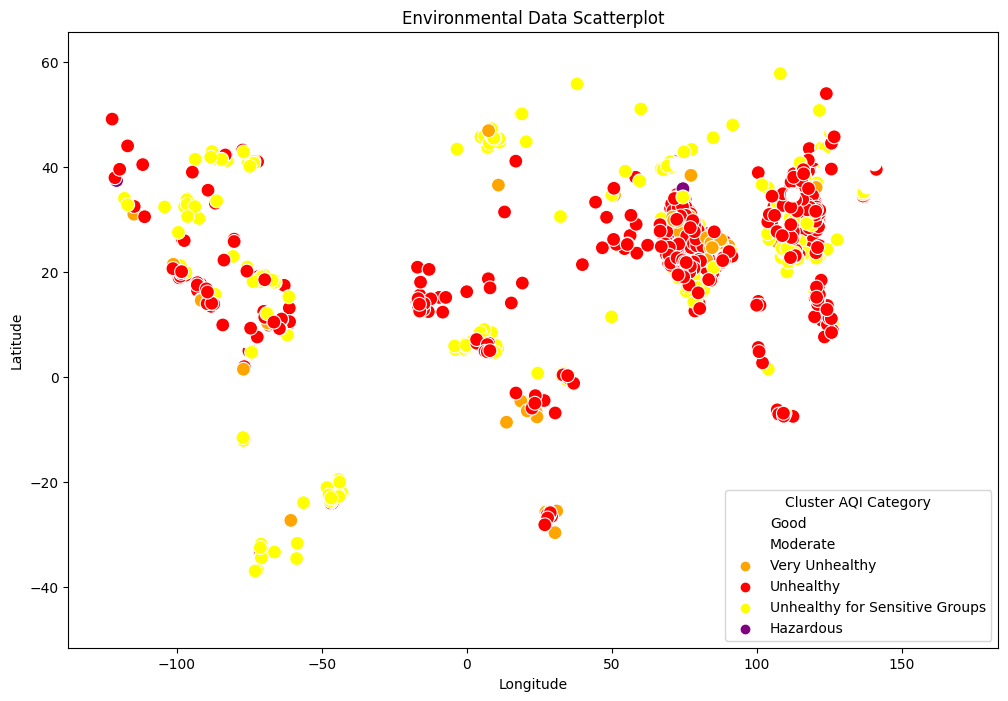

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant data points based on AQI Category
selected_categories = ['Unhealthy', 'Very Unhealthy', 'Unhealthy for Sensitive Groups', 'Hazardous']
filtered_data = data_with_cluster_aqi_category[data_with_cluster_aqi_category['AQI Category'].isin(selected_categories)]

# Define the color palette for severity levels
severity_palette = {'Unhealthy': 'red', 'Very Unhealthy': 'orange', 'Good': 'white', 'Moderate': 'white',
                    'Unhealthy for Sensitive Groups': 'yellow', 'Hazardous': 'purple'}

# Set up the scatterplot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.scatterplot(data=filtered_data, x='lng', y='lat', hue='Cluster AQI Category',
                palette=severity_palette, s=100)

# Set the title and axis labels
plt.title('Environmental Data Scatterplot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
!pip install geopandas
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 72.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 91.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.1 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102743 sha256=5f6

<ipython-input-203-841d9c475ded>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


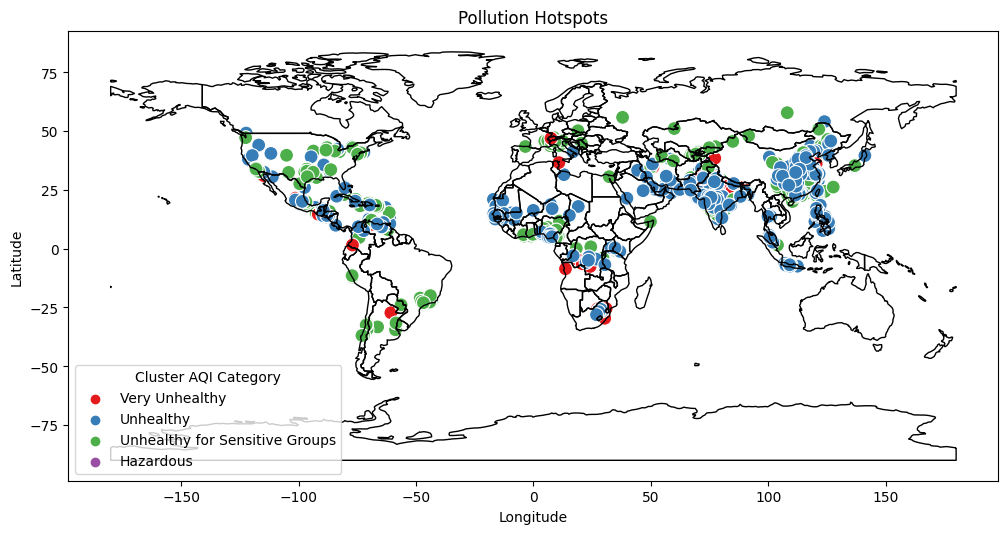

In [ ]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant data points based on AQI Category
selected_categories = ['Unhealthy', 'Very Unhealthy', 'Unhealthy for Sensitive Groups', 'Hazardous']
filtered_data = data_with_cluster_aqi_category[data_with_cluster_aqi_category['Cluster AQI Category'].isin(selected_categories)]

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size as needed

# Plot the world map outline
world.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot the scatterplot on top of the world map
sns.scatterplot(data=filtered_data, x='lng', y='lat', hue='Cluster AQI Category',
                palette='Set1', s=100, ax=ax)

# Set the title and axis labels
plt.title('Pollution Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


<ipython-input-204-8d0647606291>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


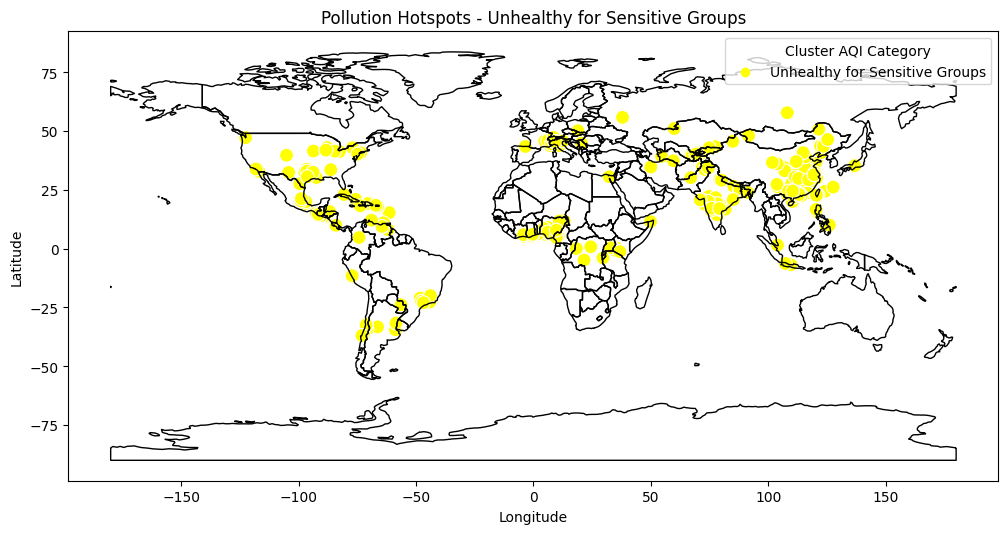

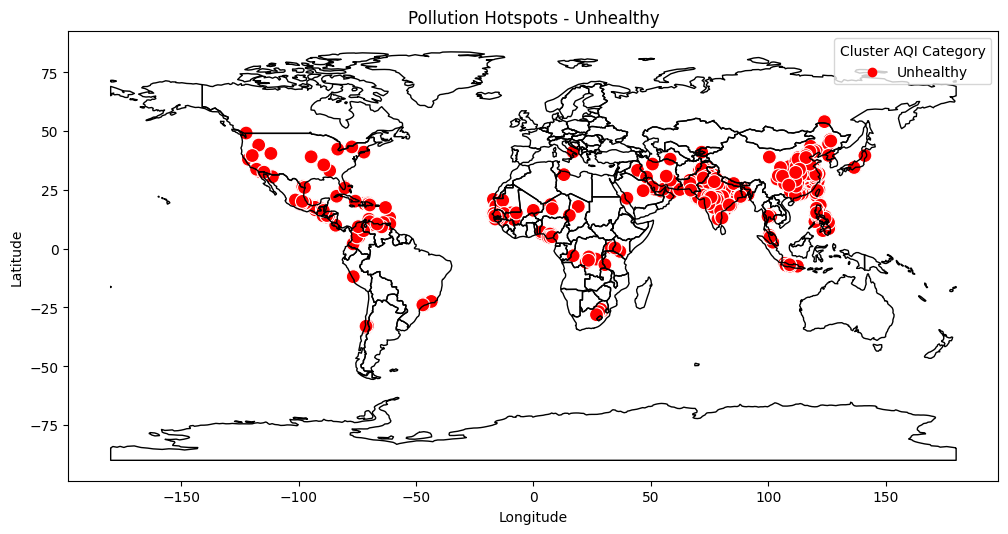

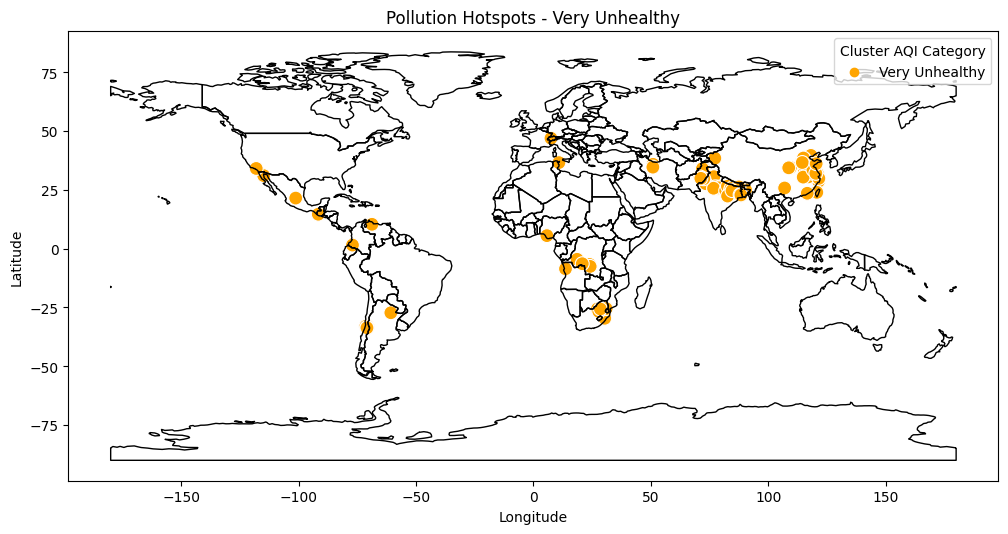

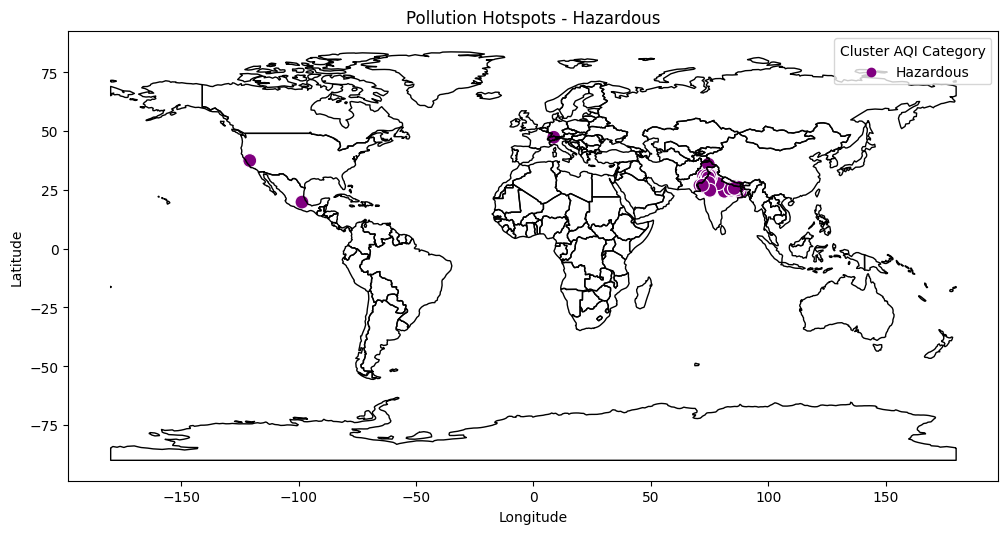

In [ ]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant data points based on AQI Category
selected_categories = [ 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Iterate over the categories and create separate maps
for category in selected_categories:
    # Filter the data for the current category
    filtered_data = data_with_cluster_aqi_category[data_with_cluster_aqi_category['Cluster AQI Category'] == category]

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the figure size as needed

    # Plot the world map outline
    world.boundary.plot(ax=ax, linewidth=1, color='black')

    # Plot the scatterplot for the current category
    sns.scatterplot(data=filtered_data, x='lng', y='lat', s=100, ax=ax, hue='Cluster AQI Category', palette=severity_palette)

    # Set the title and axis labels
    plt.title(f'Pollution Hotspots - {category}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show the plot
    plt.show()
